<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Библиотеки-для-работы" data-toc-modified-id="Библиотеки-для-работы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Библиотеки для работы</a></span></li><li><span><a href="#Загрузка-датасета-и-первичный-осмотр" data-toc-modified-id="Загрузка-датасета-и-первичный-осмотр-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Загрузка датасета и первичный осмотр</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Декомпозиция-временного-ряда" data-toc-modified-id="Декомпозиция-временного-ряда-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Декомпозиция временного ряда</a></span></li><li><span><a href="#Создание-признаков-из-времени" data-toc-modified-id="Создание-признаков-из-времени-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Создание признаков из времени</a></span></li><li><span><a href="#Изучим-коллинеарность-признаков-по-phik" data-toc-modified-id="Изучим-коллинеарность-признаков-по-phik-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изучим коллинеарность признаков по phik</a></span></li><li><span><a href="#Сброс-пропусков" data-toc-modified-id="Сброс-пропусков-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Сброс пропусков</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Подготовка-выборок" data-toc-modified-id="Подготовка-выборок-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка выборок</a></span></li><li><span><a href="#Нормирование" data-toc-modified-id="Нормирование-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Нормирование</a></span></li><li><span><a href="#Optuna" data-toc-modified-id="Optuna-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Optuna</a></span></li><li><span><a href="#DecisionTreeRegressor" data-toc-modified-id="DecisionTreeRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>DecisionTreeRegressor</a></span></li><li><span><a href="#CatBoostRegressor" data-toc-modified-id="CatBoostRegressor-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>CatBoostRegressor</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Проверка-модели-и-адекватность" data-toc-modified-id="Проверка-модели-и-адекватность-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Проверка модели и адекватность</a></span></li><li><span><a href="#Визуализация-результата" data-toc-modified-id="Визуализация-результата-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Визуализация результата</a></span></li></ul></li><li><span><a href="#Подбор-оптимального-количества-лаг-столбцов-и-катящегося-среднего-(bonus)" data-toc-modified-id="Подбор-оптимального-количества-лаг-столбцов-и-катящегося-среднего-(bonus)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подбор оптимального количества лаг столбцов и катящегося среднего (bonus)</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [1]:
SEED = 12345
ENGINE = 'GPU' # можно поставить 'CPU' - параметр для CatBoostRegressor
TRIALS = 20 # optuna model trials
MAXTIME = 300 # optuna timeout seconds

### Библиотеки для работы

Устанавливаем нестандартные библиотеки:

In [2]:
!pip install phik
!pip install optuna

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


Подключаем нужные для работы модули:

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit, train_test_split
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import optuna
import phik
from tqdm import tqdm
import warnings

In [4]:
warnings.filterwarnings('ignore')

### Загрузка датасета и первичный осмотр

Загружаем данные с сервера:
- сразу парсим даты и индекс
- проверяем сортировку по времени
- делаем ресемплинг с суммированием на часовой интервал

In [5]:
# загрузка
df = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv', index_col=['datetime'], parse_dates=['datetime'])

In [6]:
# проверка на монотонность
if df.index.is_monotonic_increasing:
    pass
else:
    df = df.sort_index()

In [7]:
# ресэмплинг и суммирование
df = df.resample('1H').sum()

In [8]:
df.head(3)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71


In [9]:
# статистика
df.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


In [10]:
# пропуски
df.isna().sum()

num_orders    0
dtype: int64

Построим гистограмму и график для оценки данных:

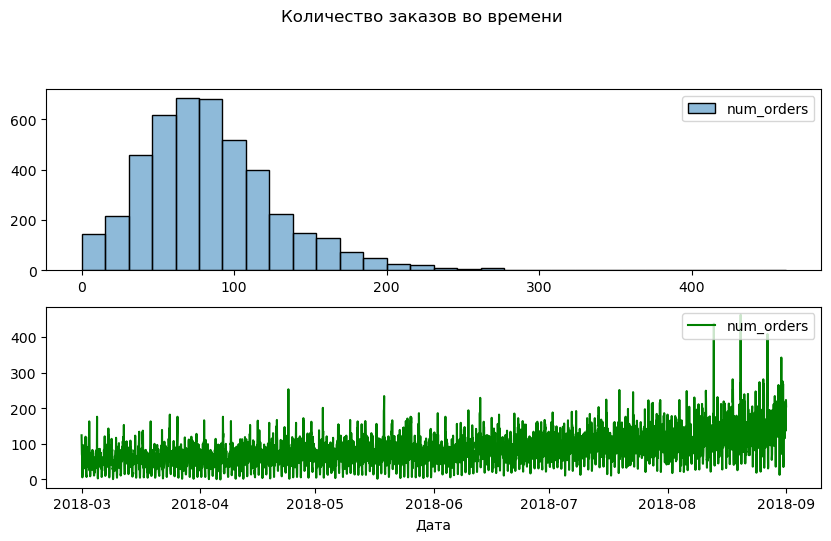

In [11]:
plt.figure(figsize=(10,8))
plt.subplot(311)
sns.histplot(df,
             bins=30)
plt.ylabel('')
plt.suptitle('Количество заказов во времени')

plt.subplot(312)
sns.lineplot(x=df.index, y=df['num_orders'],
             ax=plt.gca(),
             label = 'num_orders',
             color='green');
plt.ylabel('')
plt.legend(prop={'size': 10}, loc='upper right')
plt.xlabel('Дата');

**Вывод**
- Данные загружены
- Пропусков и сильных аномалий не обнаружено
- Распределение количества заказов близкое к нормальному

## Анализ

### Декомпозиция временного ряда

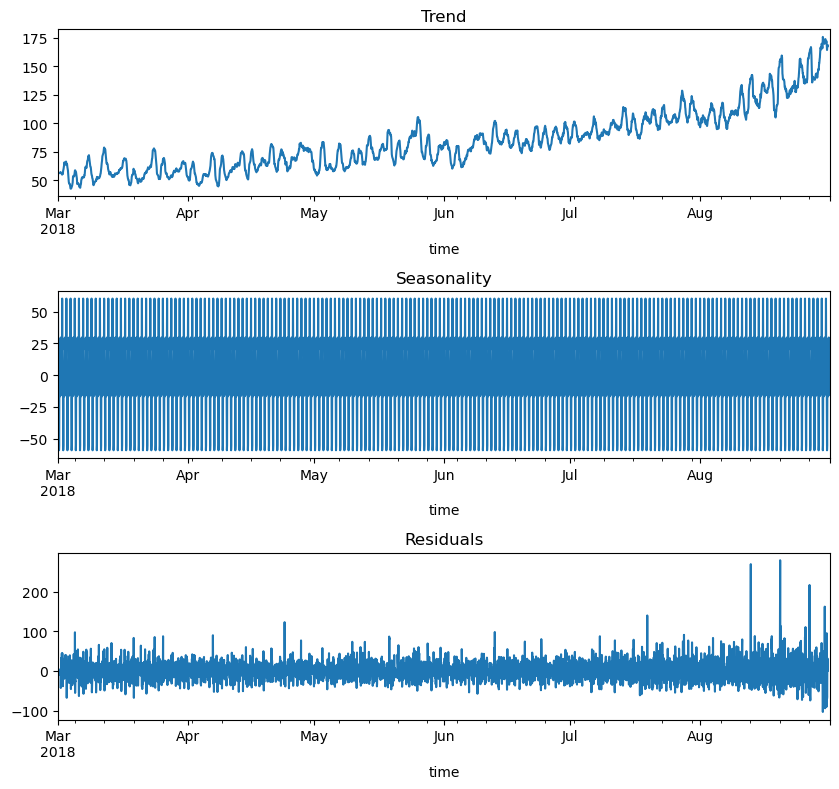

In [12]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposed = seasonal_decompose(df) 

plt.figure(figsize=(8.5, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.xlabel('time')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Seasonality')
plt.xlabel('time')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
plt.title('Residuals')
plt.xlabel('time')
plt.tight_layout()

Построим графики сезонной компоненты на месячный, недельный и дневной интервалы:

Text(0.5, 0, 'time')

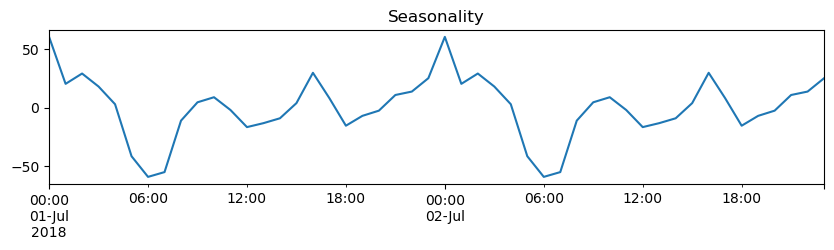

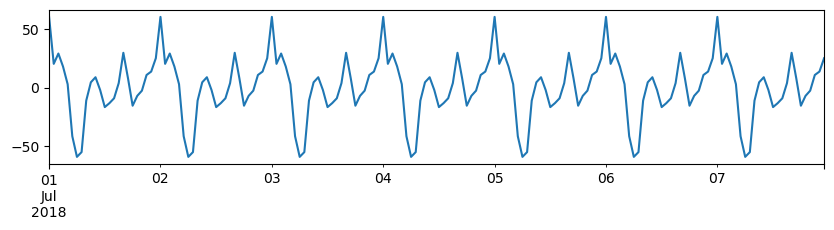

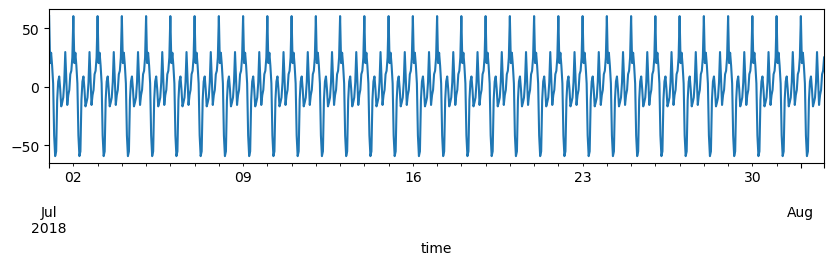

In [13]:
plt.figure(figsize=(10, 2))
decomposed.seasonal['2018-07-01':'2018-07-02'].plot(ax=plt.gca()) 
plt.title('Seasonality');
plt.xlabel('')

plt.figure(figsize=(10, 2))
decomposed.seasonal['2018-07-01':'2018-07-07'].plot(ax=plt.gca()) 
plt.xlabel('')

plt.figure(figsize=(10, 2))
decomposed.seasonal['2018-07-01':'2018-08-01'].plot(ax=plt.gca()) 
plt.xlabel('time')

**Вывод**
- Основной тренд направлен вверх. Среднее значение растет
- Есть высокочастотная сезонность
- Наиболее наглядно выглядит дневная сезонность: пики соответствуют нагруженным часам работы такси, когда люди едут на работу и с работы, а также поздне-вечернее время (скорее всего закрытие баров и других заведений)

### Создание признаков из времени

Добавляем признаки для обучения модели:

In [14]:
def make_features(df, max_lag, rolling_mean_size):
    df_out = df.copy()
    df_out['year'] = df_out.index.year
    df_out['month'] = df_out.index.month
    df_out['day'] = df_out.index.day
    df_out['dayofweek'] = df_out.index.dayofweek
    df_out['rolling_mean'] = df_out['num_orders'].shift().rolling(rolling_mean_size).mean()
    for lag in range(1, max_lag + 1):
        df_out['lag_{}'.format(lag)] = df_out['num_orders'].shift(lag)

    return df_out

Учитывая явную суточную сезонность данных возьмем в качестве лаг-столбцов последние 24 часа:

In [15]:
df_model = make_features(df, 24, 10)

### Изучим коллинеарность признаков по phik

In [16]:
correlations_phik = df_model.phik_matrix()

interval columns not set, guessing: ['num_orders', 'year', 'month', 'day', 'dayofweek', 'rolling_mean', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8', 'lag_9', 'lag_10', 'lag_11', 'lag_12', 'lag_13', 'lag_14', 'lag_15', 'lag_16', 'lag_17', 'lag_18', 'lag_19', 'lag_20', 'lag_21', 'lag_22', 'lag_23', 'lag_24']


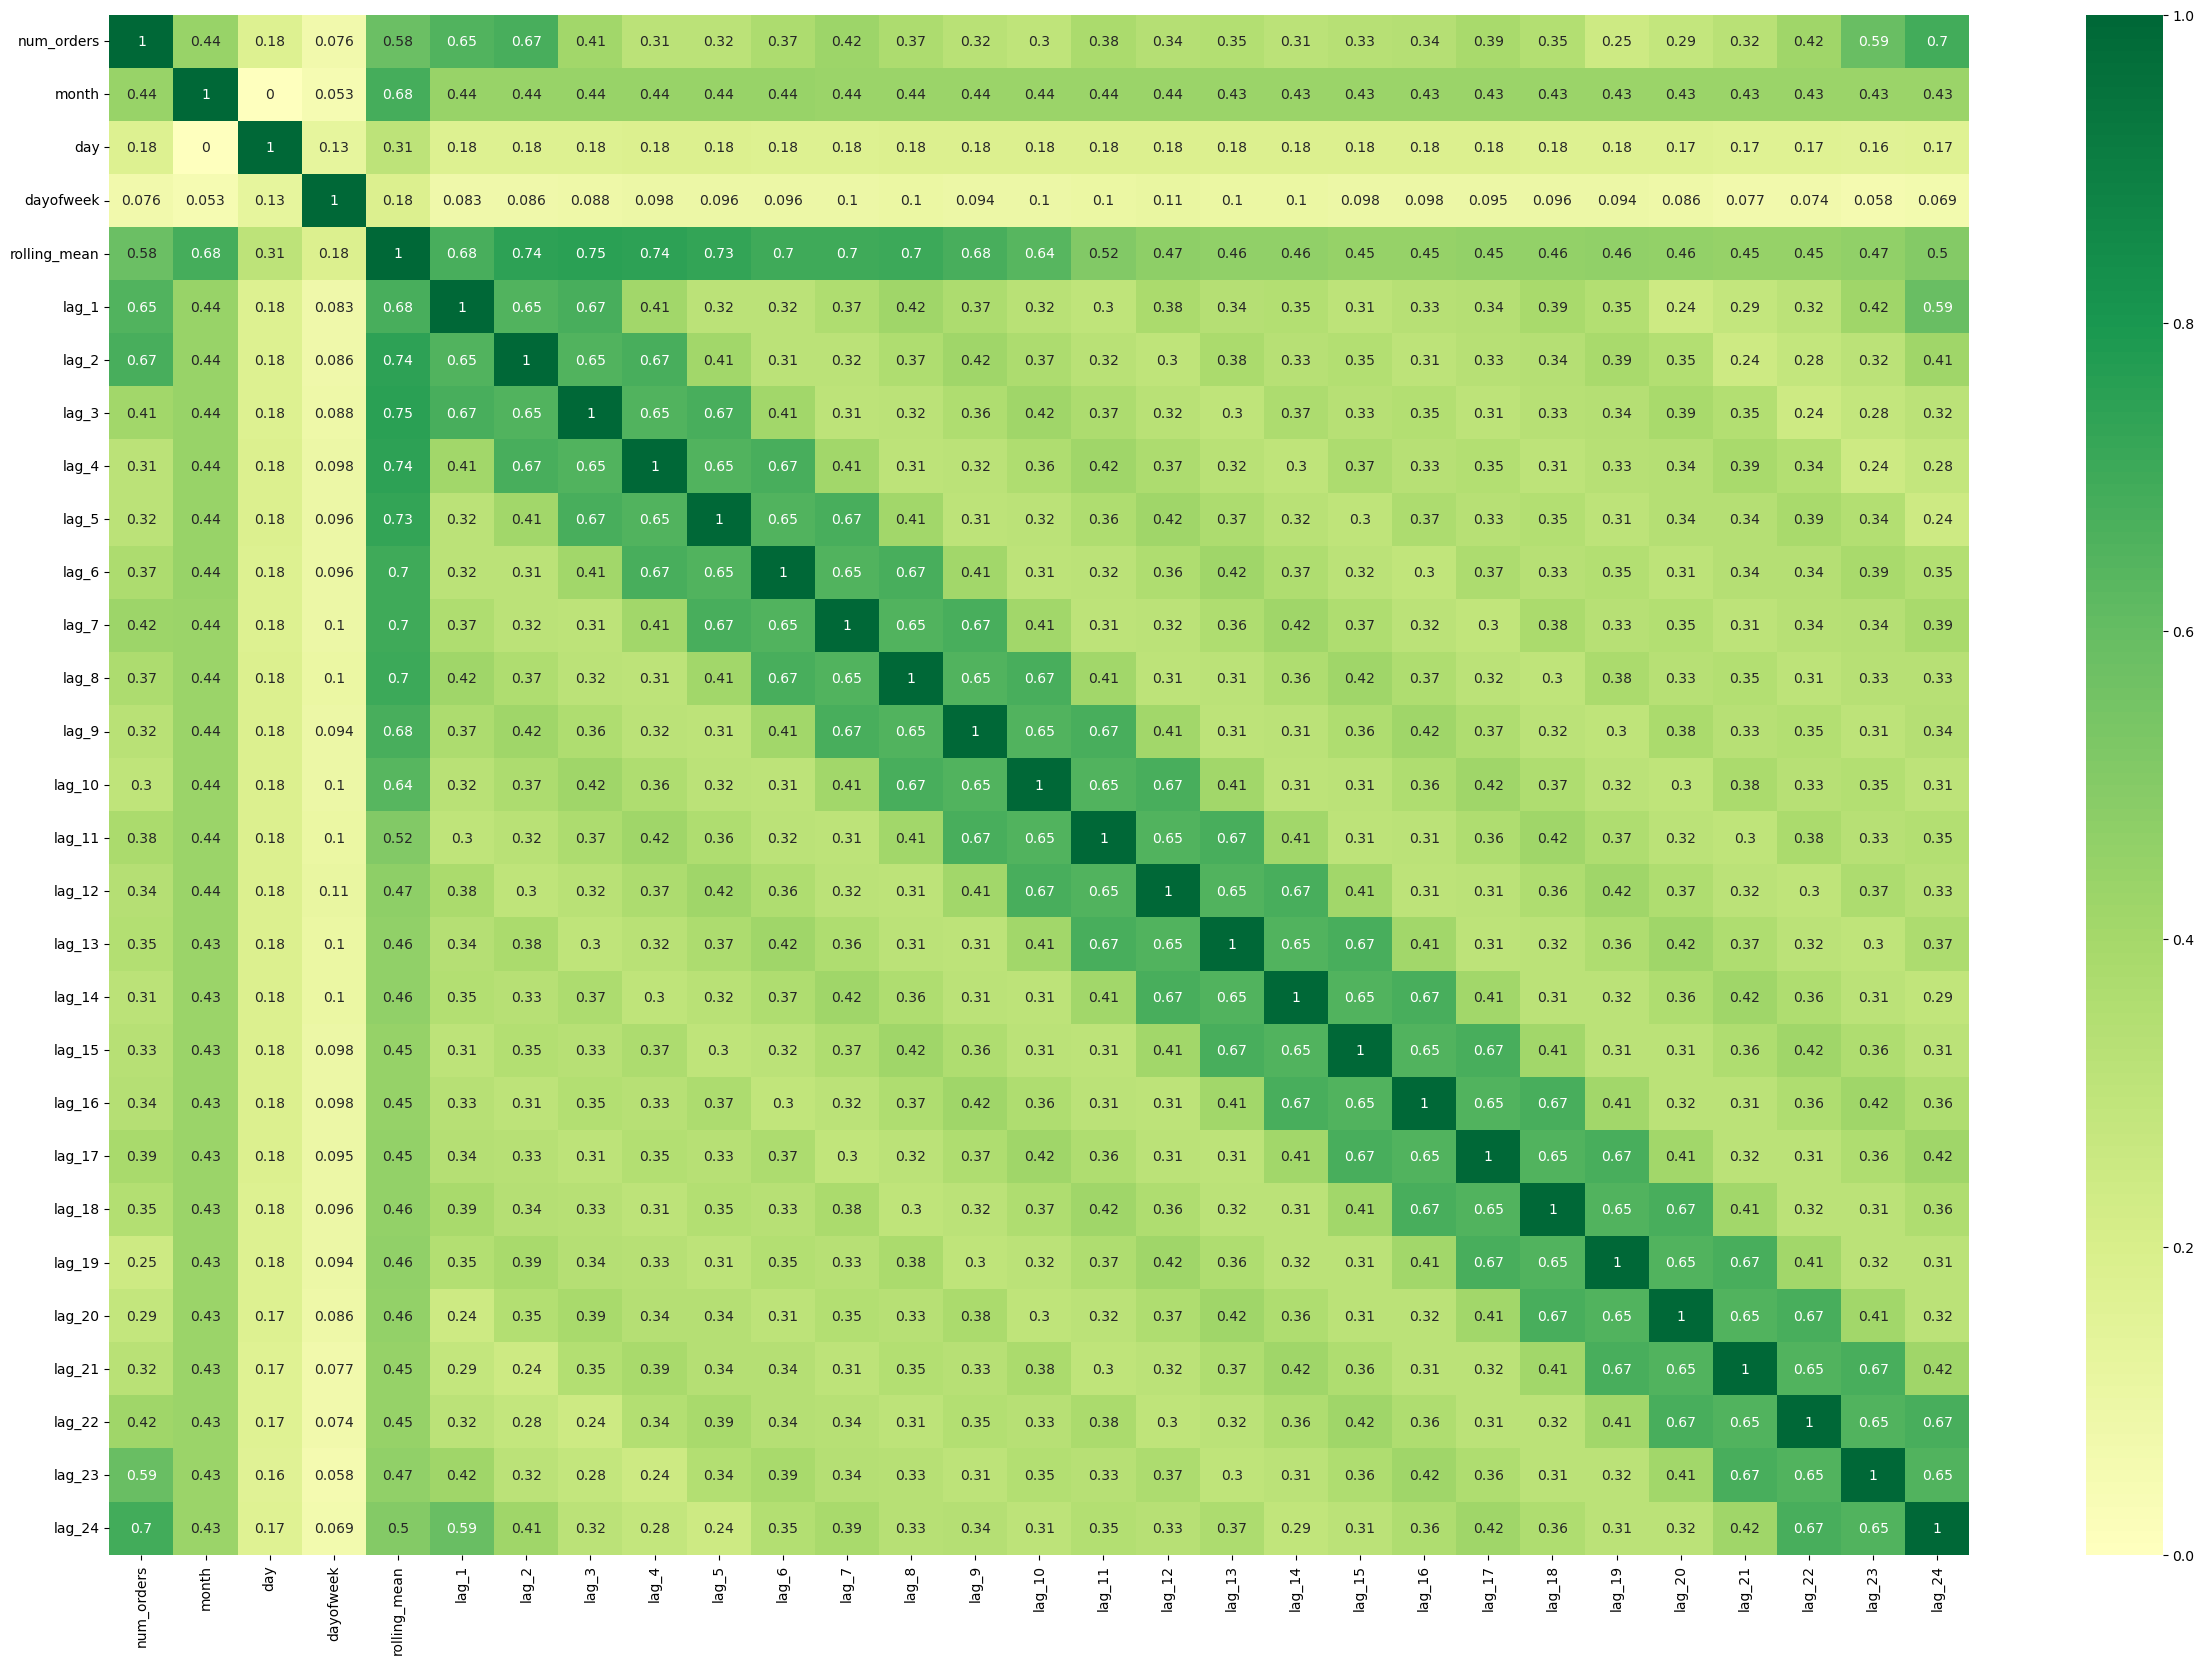

In [17]:
plt.figure(figsize=(30,20))
sns.heatmap(correlations_phik,
            cmap='RdYlGn',
            center=0,
            annot=True);

Есть ощутимые зависимости между признаками, но явно коллинеарных с R > 0.9 не обнаружено. Можем себе позволить оставить все для обучения:)

### Сброс пропусков

Нужно выбросить пропуски, образовавшиеся из-за shift():

In [18]:
df_model = df_model.dropna()

## Обучение

### Подготовка выборок

In [19]:
train, test = train_test_split(df_model, shuffle=False, test_size=0.1)
train.shape, test.shape

((3952, 30), (440, 30))

In [20]:
x_train = train.drop(['num_orders'], axis=1)
x_test = test.drop(['num_orders'], axis=1)
y_train = train['num_orders']
y_test = test['num_orders']
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3952, 29), (3952,), (440, 29), (440,))

### Нормирование

In [21]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = pd.DataFrame(scaler.transform(x_train), columns = x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x_test.columns)

x_train.head(3)

,year,month,day,dayofweek,rolling_mean,lag_1,lag_2,lag_3,lag_4,lag_5,...,lag_15,lag_16,lag_17,lag_18,lag_19,lag_20,lag_21,lag_22,lag_23,lag_24
0,0.0,-1.424409,-1.494599,0.485927,-0.718084,-0.528019,0.893921,-0.320922,-0.450002,-0.863303,...,-0.239546,-1.158687,-1.658000,-1.735774,-1.892353,-0.919243,-0.314539,-0.183060,0.185170,1.211019
1,0.0,-1.424409,-1.494599,0.485927,-0.537168,0.299361,-0.528062,0.894380,-0.320716,-0.449476,...,-0.370903,-0.238808,-1.158312,-1.656894,-1.734622,-1.891852,-0.919127,-0.314491,-0.182881,0.185419
2,0.0,-1.424409,-1.494599,0.485927,-0.304561,1.075030,0.299273,-0.527782,0.894574,-0.320155,...,0.469779,-0.370219,-0.237833,-1.157327,-1.655756,-1.734131,-1.891724,-0.919076,-0.314328,-0.182744


### Optuna

Будем применять `DecisionTreeRegressor` и `CatBoostregressor` в комбинации с фреймворком `optuna` для поиска лучших гиперпараметров. Также добавим кастомную кросс-валидацию через `TimeSeriesSplit`

### DecisionTreeRegressor

Создаем `objective` для `optuna`:
- Подбираем `max_depth`, `min_samples_split`, `min_samples_leaf`

In [22]:
def objective_dtr(trial):
    params = {
        'max_depth': trial.suggest_int('max_depth', 2, 10), 
        'min_samples_split' :  trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf':  trial.suggest_int('min_samples_leaf', 1, 10),
        'random_state': SEED,
    }

    # k-fold cross-validation
    tss = TimeSeriesSplit(n_splits=6)
    scores = []

    # модель и скор для каждого фолда
    for train_idx, val_idx in tss.split(x_train):
        x_optuna_train, y_optuna_train = x_train.iloc[train_idx], y_train.iloc[train_idx]
        x_optuna_val, y_optuna_val = x_train.iloc[val_idx], y_train.iloc[val_idx]
        model = DecisionTreeRegressor(**params)
        model.fit(x_optuna_train, y_optuna_train)
        score = mean_squared_error(y_optuna_val, model.predict(x_optuna_val))**0.5
        scores.append(score)
    return sum(scores)/len(scores)

In [23]:
# поиск параметров, макс 20 попыток и 5 минут
study_dtr = optuna.create_study(direction='minimize', study_name='taxi time series DTR')
study_dtr.optimize(objective_dtr, n_trials=TRIALS, timeout=MAXTIME)

[I 2023-05-10 16:17:22,600] A new study created in memory with name: taxi time series DTR
[I 2023-05-10 16:17:22,700] Trial 0 finished with value: 30.67346244882749 and parameters: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 8}. Best is trial 0 with value: 30.67346244882749.
[I 2023-05-10 16:17:22,796] Trial 1 finished with value: 30.42470289381014 and parameters: {'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 9}. Best is trial 1 with value: 30.42470289381014.
[I 2023-05-10 16:17:22,879] Trial 2 finished with value: 30.89692122151115 and parameters: {'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 3}. Best is trial 1 with value: 30.42470289381014.
[I 2023-05-10 16:17:22,930] Trial 3 finished with value: 29.86871649255669 and parameters: {'max_depth': 4, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 3 with value: 29.86871649255669.
[I 2023-05-10 16:17:22,962] Trial 4 finished with value: 31.82560064764307 and parameters: {'max

In [24]:
study_dtr.best_params

{'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 4}

In [25]:
print('RMSE = ', study_dtr.best_trial.values)

RMSE =  [29.473656961123698]


### CatBoostRegressor

Создаем `objective` для `optuna`:
- Подбираем `iterations`, `learning_rate`, `depth`, `l2_leaf_reg`, `border_count`,`bagging_temperature`, `random_strength`
- Используем защиту от переобучения `od_type` = 'Iter' на 100 итераций

In [26]:
def objective_cbr(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-5, 10),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
        'random_strength': trial.suggest_loguniform('random_strength', 1e-9, 10),
        'od_type': 'Iter',
        'od_wait': 50,
        'task_type': ENGINE,
        'eval_metric': 'RMSE',
        'verbose': False,
        'random_state': SEED,
        'thread_count': -1
    }

    # k-fold cross-validation
    tss = TimeSeriesSplit(n_splits=4)
    scores = []

    # модель и скор для каждого фолда
    for train_idx, val_idx in tss.split(x_train):
        x_optuna_train, y_optuna_train = x_train.iloc[train_idx], y_train.iloc[train_idx]
        x_optuna_val, y_optuna_val = x_train.iloc[val_idx], y_train.iloc[val_idx]
        model = CatBoostRegressor(**params)
        model.fit(x_optuna_train, y_optuna_train,
                  eval_set=(x_optuna_val, y_optuna_val), early_stopping_rounds=50, verbose=False)
        score = model.best_score_['validation']['RMSE']
        scores.append(score)
    return sum(scores)/len(scores)

Запуск подбора:

In [27]:
# поиск параметров, макс 20 попыток и 5 минут
study_cbr = optuna.create_study(direction='minimize', study_name='taxi time series CBR')
study_cbr.optimize(objective_cbr, n_trials=TRIALS, timeout=MAXTIME)

[I 2023-05-10 16:17:24,044] A new study created in memory with name: taxi time series CBR
[I 2023-05-10 16:17:48,529] Trial 0 finished with value: 31.20291704437136 and parameters: {'iterations': 538, 'learning_rate': 0.001997449212124958, 'depth': 7, 'l2_leaf_reg': 1.2093847262958628, 'border_count': 141, 'bagging_temperature': 0.05420036869356372, 'random_strength': 7.492611973775827e-09}. Best is trial 0 with value: 31.20291704437136.
[I 2023-05-10 16:18:01,026] Trial 1 finished with value: 39.93208403614383 and parameters: {'iterations': 694, 'learning_rate': 0.006144799194563513, 'depth': 4, 'l2_leaf_reg': 9.692263233859459, 'border_count': 153, 'bagging_temperature': 46.79888945110204, 'random_strength': 1.3070440920632852e-07}. Best is trial 0 with value: 31.20291704437136.
[I 2023-05-10 16:18:07,441] Trial 2 finished with value: 25.706699452795526 and parameters: {'iterations': 402, 'learning_rate': 0.07215166815714019, 'depth': 7, 'l2_leaf_reg': 5.3275723043736125, 'border_cou

Лучшие подобранные параметры при обучении:

In [28]:
study_cbr.best_params

{'iterations': 342,
 'learning_rate': 0.03625844349935616,
 'depth': 6,
 'l2_leaf_reg': 0.002315113928599863,
 'border_count': 102,
 'bagging_temperature': 0.16966561588279422,
 'random_strength': 0.04990707478903977}

In [29]:
print('RMSE = ', study_cbr.best_trial.values)

RMSE =  [25.457774913701556]


## Тестирование

### Проверка модели и адекватность

Проверяем лучшую модель на тесте с подобранными параметрами:

In [30]:
cbr = CatBoostRegressor(random_state=SEED,
                        task_type=ENGINE,
                        **study_cbr.best_params)
cbr.fit(x_train, y_train, eval_set=(x_test, y_test), verbose=False)

print('RMSE = ', mean_squared_error(y_test, cbr.predict(x_test))**0.5)

RMSE =  41.33931855806428


Результат лучше, чем требуется (RMSE <= 48)

Дополнительно посмотрим на DummyRegressor:

In [31]:
dr = DummyRegressor(strategy='mean')
dr.fit(x_train, y_train)

print('RMSE = ', mean_squared_error(y_test, dr.predict(x_test))**0.5)

RMSE =  84.68768287118466


### Визуализация результата

In [32]:
res = np.array([cbr.predict(x_test), y_test])
res = pd.DataFrame(res.T, columns=['CBR', 'fact'], index=y_test.index)
res

,CBR,fact
datetime,,
2018-08-13 16:00:00,158.663235,144.0
2018-08-13 17:00:00,146.949578,152.0
2018-08-13 18:00:00,102.954855,104.0
2018-08-13 19:00:00,105.823974,91.0
2018-08-13 20:00:00,107.022652,82.0
...,...,...
2018-08-31 19:00:00,116.178730,136.0
2018-08-31 20:00:00,163.343308,154.0
2018-08-31 21:00:00,162.729816,159.0


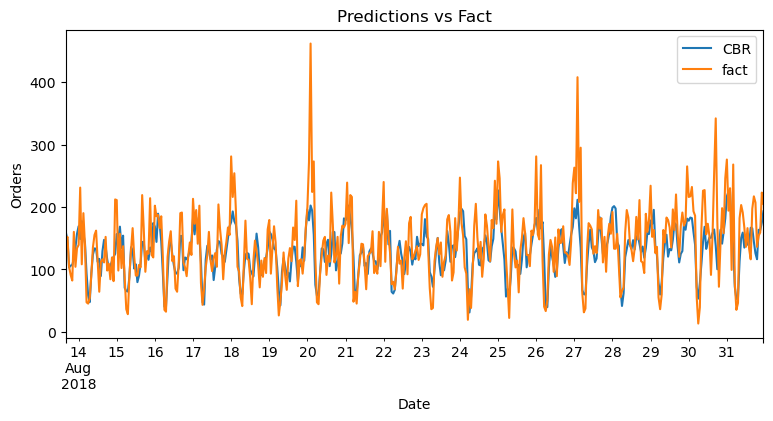

In [33]:
res.plot(figsize=(9,4),
         title = 'Predictions vs Fact',
         ylabel = 'Orders',
         xlabel = 'Date');

## Подбор оптимального количества лаг столбцов и катящегося среднего (bonus)

Делаем перебор по количеству лаг столбцов и катящемуся среднему:

In [34]:
%%time
iterations_lag = [2*i for i in range(1,40)]
iterations_rolling = [3*i for i in range(2,12)]
scores = []
for lag in tqdm(iterations_lag):
    for rolling in iterations_rolling:
        # features
        df_exp = make_features(df, lag, rolling)
        df_exp = df_exp.dropna()
        # train/test
        train_exp, test_exp = train_test_split(df_exp, shuffle=False, test_size=0.1)
        x_train_exp = train_exp.drop(['num_orders'], axis=1)
        x_test_exp = test_exp.drop(['num_orders'], axis=1)
        y_train_exp = train_exp['num_orders']
        y_test_exp = test_exp['num_orders']
        # scaler
        scaler = StandardScaler()
        scaler.fit(x_train_exp)
        x_train_exp = pd.DataFrame(scaler.transform(x_train_exp), columns = x_train_exp.columns)
        x_test_exp = pd.DataFrame(scaler.transform(x_test_exp), columns = x_test_exp.columns)
        cbr_exp = CatBoostRegressor(random_state=SEED,
                            task_type=ENGINE,
                            **study_cbr.best_params)
        cbr_exp.fit(x_train_exp, y_train_exp, eval_set=(x_test_exp, y_test_exp), verbose=False)
        score = mean_squared_error(y_test_exp, cbr_exp.predict(x_test_exp))**0.5
        scores.append([lag, rolling, score])
scores = np.array(scores)

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [10:05<00:00, 15.54s/it]

CPU times: total: 8min 5s
Wall time: 10min 5s


И строим график:

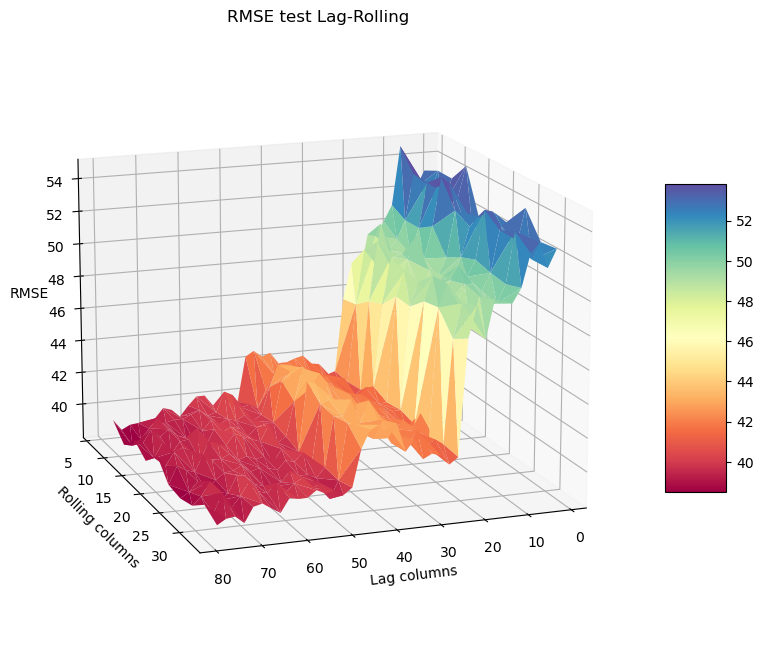

In [35]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(scores.T[0],
                       scores.T[1],
                       scores.T[2],
                       cmap=plt.cm.Spectral,
                       linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(15, 70)
ax.set_xlabel('Lag columns')
ax.set_ylabel('Rolling columns')
ax.set_zlabel('RMSE')
ax.set_title('RMSE test Lag-Rolling')
plt.show()

Таким образом, приходим к выводу, что выбранный интервал в 24 часа является одним из оптимальных вариантов в данной модели, а количество столбцов в катящемся среднем влияет на качество модели не так критично.

## Вывод
- Подобраны оптимальные параметры обучения
- На тестовой выборке модель показала результат, значительно превосходящий требуемый RMSE = 48 по условиям задачи
- Дополнительно для лучшей модели протестированы разные входные данные и выявлены закономерности